In [1]:
import pandas as pd
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')
print("Customers DataFrame:")
print(customers.head())

print("\nProducts DataFrame:")
print(products.head())

print("\nTransactions DataFrame:")
print(transactions.head())

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00

In [2]:
# Display the first few rows of each dataset to understand their structure
print(customers.head())  # Preview the Customers dataset
print(products.head())   # Preview the Products dataset
print(transactions.head())  # Preview the Transactions dataset

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.isnull().sum())  # Summarize null values in the Customers dataset
print(products.isnull().sum())   # Summarize null values in the Products dataset
print(transactions.isnull().sum())  # Summarize null values in the Transactions dataset


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Merge the datasets for a unified view of customer-product-transaction relationships
merged_data = transactions.merge(customers, on='CustomerID')

In [8]:
from datetime import datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [11]:
# Merging the transactions dataset with the customers dataset on the common column 'CustomerID'

merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')


print("\nMerged Data Summary:")
print(merged_data.columns)
print("\nCount of Non-Null Values in Each Column:")

print(merged_data.count)


Merged Data Summary:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

Count of Non-Null Values in Each Column:
<bound method DataFrame.count of     TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018     

In [12]:
# Check for missing values in each column of the merged dataset
missing_values = merged_data.isnull().sum()
print("Missing Values in Each Column of the Merged Data:")
print(missing_values)

# Filter the dataset to find rows with at least one missing value
missing_rows = merged_data[merged_data.isnull().any(axis=1)]
print("\nRows with Missing Values in the Merged Data:")
print(missing_rows)



Missing Values in Each Column of the Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Rows with Missing Values in the Merged Data:
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price_x, CustomerName, Region, SignupDate, ProductName, Category, Price_y]
Index: []


In [13]:
# Includes metrics like mean, standard deviation, min, and max to assess data distributions
print("\nStatistical Summary of Merged Data:")
print(merged_data.describe())


Statistical Summary of Merged Data:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%  

In [14]:
print(merged_data.describe())


                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

EDA(Exploratory Data Analysis)

In [20]:
pip install matplotlib


     ---------------------------------------- 0.0/169.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/169.5 kB 640.0 kB/s eta 0:00:01
     ------------------------------------ - 163.8/169.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 169.5/169.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 8.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/8.0 MB 5.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 4.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 4.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.0 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.0 MB 4.5 MB/s eta 0:00:02
   -------


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install seaborn



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully!")


Libraries imported successfully!


C:\Users\hasth\AppData\Local\Temp\ipykernel_10164\1886170357.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
C:\Users\hasth\AppData\Local\Temp\ipykernel_10164\1886170357.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, count + 1, f'{percentages[index]:.2f}%', ha='center', fontsize=10)


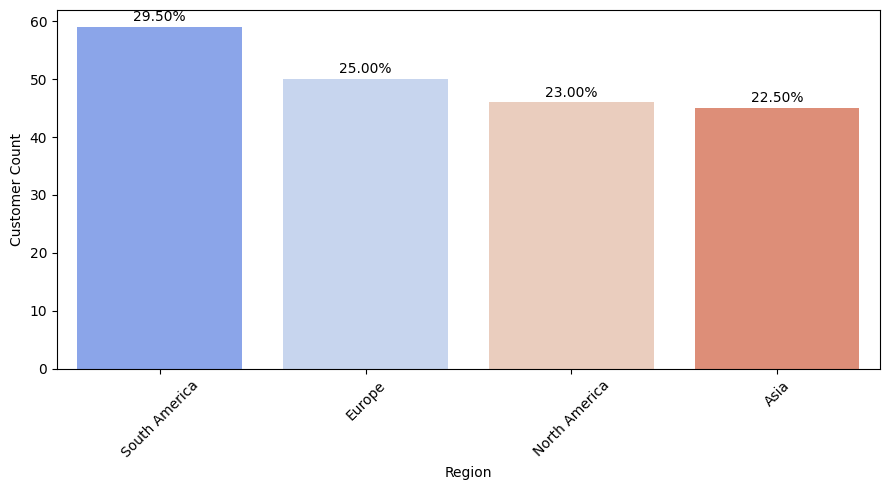

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count customers by region
region_counts = customers['Region'].value_counts()

# Create the bar plot
plt.figure(figsize=(9, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.ylabel("Customer Count")
plt.xticks(rotation=45)

# Add percentage annotations
total_customers = region_counts.sum()
percentages = (region_counts / total_customers) * 100
for index, count in enumerate(region_counts):
    plt.text(index, count + 1, f'{percentages[index]:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\hasth\AppData\Local\Temp\ipykernel_10164\774302765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='mako')  # Use 'mako' palette for a fresh look


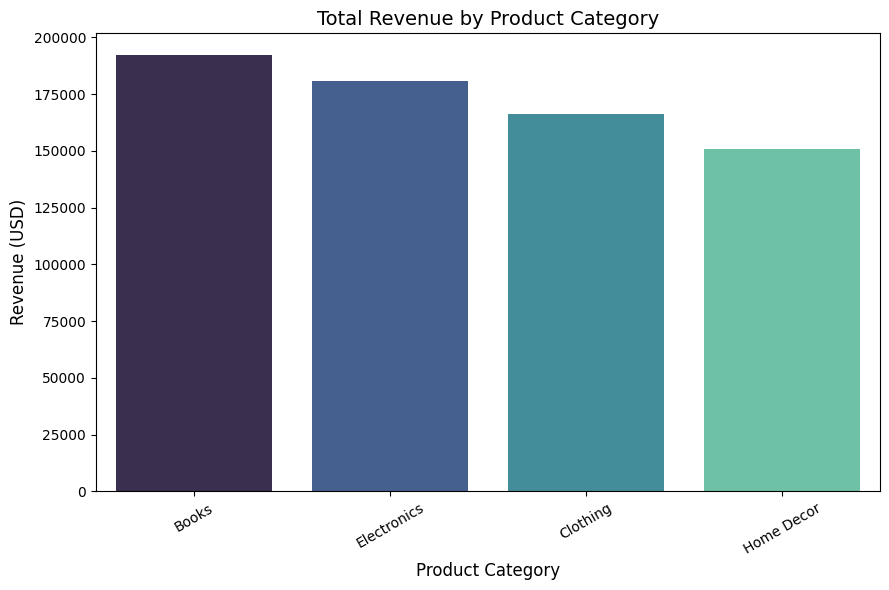

In [25]:
# Calculate total revenue for each product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Create a bar plot to visualize total revenue by product category
plt.figure(figsize=(9, 6))  # Set figure size for better visualization
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='mako')  # Use 'mako' palette for a fresh look
plt.title("Total Revenue by Product Category", fontsize=14)  # Add a descriptive title
plt.xlabel("Product Category", fontsize=12)  # Label for the x-axis
plt.ylabel("Revenue (USD)", fontsize=12)  # Label for the y-axis
plt.xticks(rotation=30)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


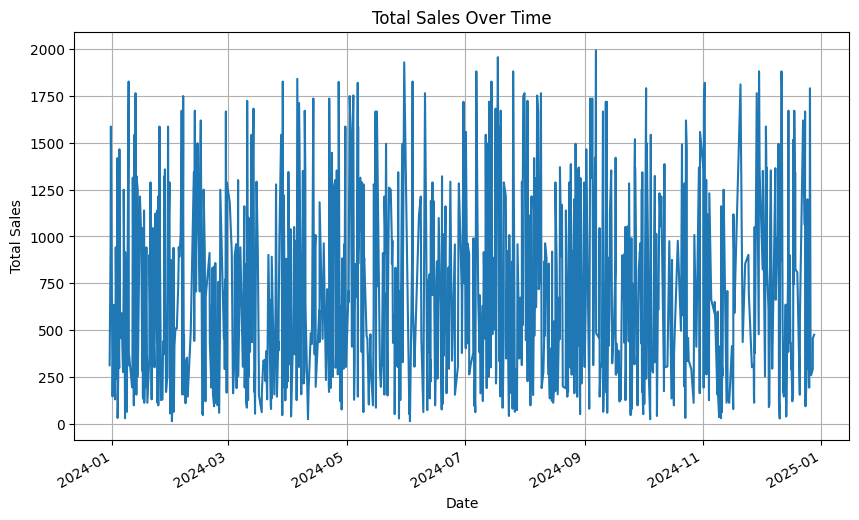

In [26]:
#3.Transaction
daily_sales = merged_data.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

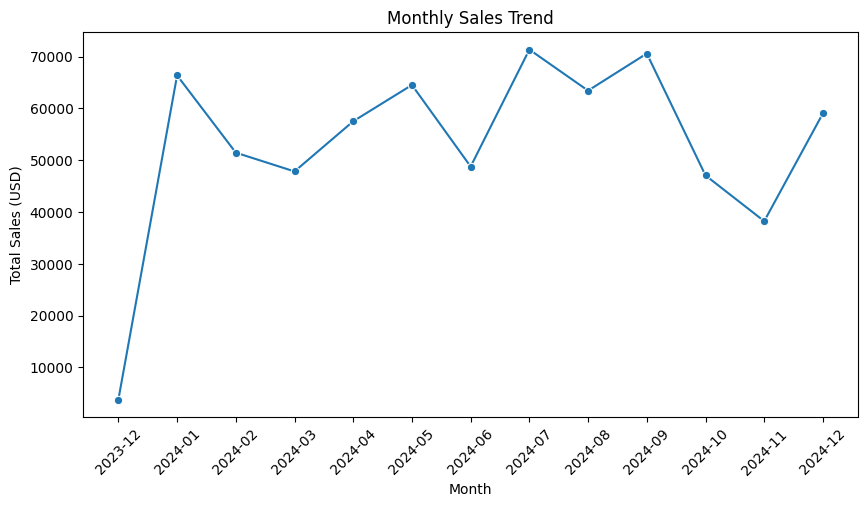

In [27]:
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.index = monthly_sales.index.astype(str)  # Convert to string for proper plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

C:\Users\hasth\AppData\Local\Temp\ipykernel_10164\537120436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')


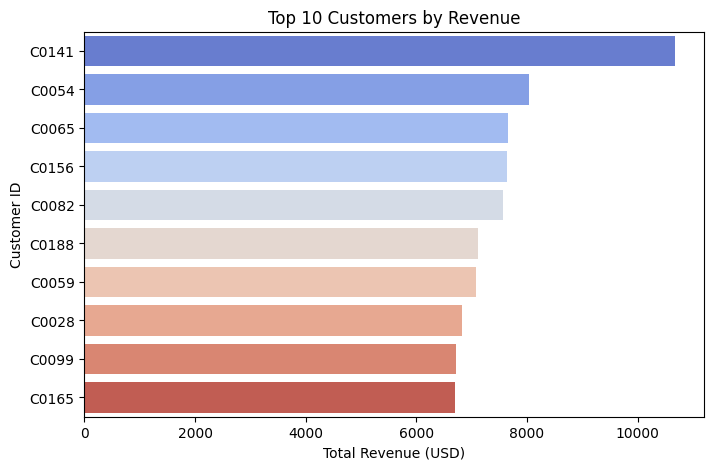

In [28]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.show()

In [29]:
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.month)['TotalValue'].sum()
peak_month = monthly_sales.idxmax()
print(f"4. Sales peak in month {peak_month}, indicating high seasonal demand.")


4. Sales peak in month 7, indicating high seasonal demand.
